<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2021/22 Term 2
</div>

# CS105 Group Project Submission (Final)

-----
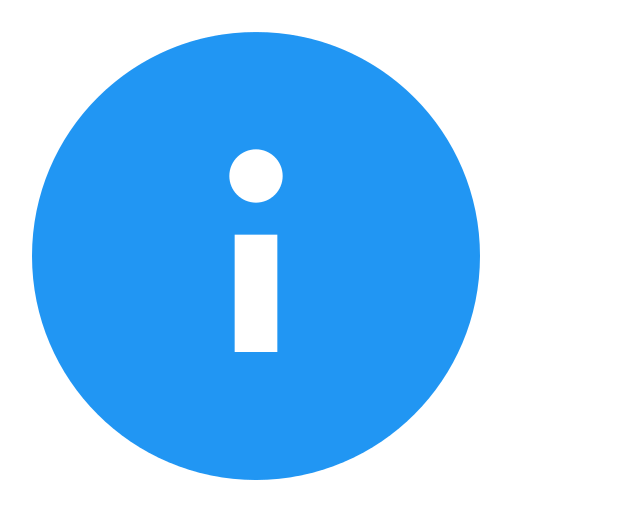Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.

Include both Part I and Part II to produce a self-contained notebook. You may fine-tune Part I codes and/or findings based on feedback received on Part I submission.
<br>
-----

#### Section: 3
#### Team: 4
#### Members:
1. AGRAWAL SHARAD
2. VALENTINO ONG
3. LEE YU EN HECTOR
4. SHERLIN CHOO ZHI YI
5. JASJYOT KAUR NARULA

#### Dataset: Housing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('housing.csv')
df_copy = df
df_rows, df_cols = df.shape

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

**Response.** 
The Housing dataset contains data from a census survey with regards to housing in a region. Each row 
corresponds to a town, hence the values of each attribute is for each town. 506 towns are recorded, each with a unique ID, and other are non-unique values.

<font color = red size = 3>
   [1a] 3%
</font>

**Response.** 

**b.** State the size of the dataset

In [2]:
df.size

7084

In [3]:
print(f'There are {df_rows} entries and {df_cols} columns.')

There are 506 entries and 14 columns.


<font color = red size = 3>
   [1b] 2%
</font>

**Response.** The size is 7084, with 506 entries and 14 columns

**c.** For each variable, describe what it represents and its data type (numerical or categorical)

**Response.**

In [4]:
data = [["ID", "Identification Number", "Categorical"], ["Crime Rate", "Crime_Rate per capita", "Categorical"], ["Residential_Area", "Proportion of residential area", "Categorical"], ["Non_Retail", "Percentage of business areas used for non-retail", "Numerical"], ["River", "Near bridge", "Categorical"], ["Pollutants", "Concentration of pollutants (parts per 10 million)", "Numerical"], ["Rooms", "Number of Rooms Per unit", "Numerical"], ["Old_Housing", "Percentage of units built before second world war", "Numerical"], ["Distance_Office", "Weighted distances to major office areas", "Numerical"], ["Highway_Access", "Accessibility to major highways", "Categorical"], ["Tax_Rate", "Property tax rate per $10,000", "Numerical"], ["Student_Teacher_Ratio", "Student to teacher ratio", "Numerical"], ["Low_Income", "Percentage of low income households", "Numerical"], ["Price", "Median price of homes (in $1000s)", "Numerical"]]
pd.DataFrame(data, columns=["Name", "Description of Data", "Data Type (Numerical or Categorical"])

,Name,Description of Data,Data Type (Numerical or Categorical
0,ID,Identification Number,Categorical
1,Crime Rate,Crime_Rate per capita,Categorical
2,Residential_Area,Proportion of residential area,Categorical
3,Non_Retail,Percentage of business areas used for non-retail,Numerical
4,River,Near bridge,Categorical
5,Pollutants,Concentration of pollutants (parts per 10 mill...,Numerical
6,Rooms,Number of Rooms Per unit,Numerical
7,Old_Housing,Percentage of units built before second world war,Numerical
8,Distance_Office,Weighted distances to major office areas,Numerical
9,Highway_Access,Accessibility to major highways,Categorical


<font color = red size = 3>
   [1c] 10%
</font>

### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

**Response.** 
The variable ID has 3.557312% missing data and the variable highway_access has 2.964427% missing data. All other variables have no missing data. (code for percentage of missing data below)

For the variable ID, the missing values are filled in according to the index of the row. We assume that ID is in ascending order.

For the variable Highway_Access, the missing values are imputed using the mode. We assume that for rows with missing highway access, the highway access is the same as the most common highway access.

<font color = red size = 3>
   Sound approach
</font>

In [5]:
#Percentage of missing rows
(1 - df_copy.count() / df.shape[0]) * 100

ID                       3.557312
Crime_Rate               0.000000
Residential_Area         0.000000
Non_Retail               0.000000
River                    0.000000
Pollutants               0.000000
Rooms                    0.000000
Old_Housing              0.000000
Distance_Office          0.000000
Highway_Access           2.964427
Tax_Rate                 0.000000
Student_Teacher_Ratio    0.000000
Low_Income               0.000000
Price                    0.000000
dtype: float64

In [6]:
#fills id column based on index
index_list = df.index[df.ID.isnull()].tolist()
value_list = [x + 1.0 for x in index_list]
a_dictionary = dict(zip(index_list, value_list))
df.ID.fillna(a_dictionary, inplace = True)

#fills highway_access column based on mode
highway_mode = df.Highway_Access.mode()[0]
df.Highway_Access.fillna(highway_mode, inplace = True)

# New percentage of missing data
(1 - df.count() / df.shape[0]) * 100

ID                       0.0
Crime_Rate               0.0
Residential_Area         0.0
Non_Retail               0.0
River                    0.0
Pollutants               0.0
Rooms                    0.0
Old_Housing              0.0
Distance_Office          0.0
Highway_Access           0.0
Tax_Rate                 0.0
Student_Teacher_Ratio    0.0
Low_Income               0.0
Price                    0.0
dtype: float64

<font color = red size = 3>
   [2a] 15%
</font>

**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

**Response.**  
Firstly, since 'Non_Retail', 'Old_Housing' and 'Low_Income' all contain percentage values, for these columns we drop all rows that contain values outside the range [0, 100].

For the remaining numerical columns, we use boxplots to determine the presence of outliers. From the boxplots below, we can determine that the variables 'Rooms', 'Distance_Office', 'Student_Teacher_Ratio', and 'Price' all have outliers.

We resolve outliers by dropping rows that contain them from the dataframe. The boxplots as shown below are using the original data with the outliers.

In total, 82 (16.21%) rows were removed from the dataset.

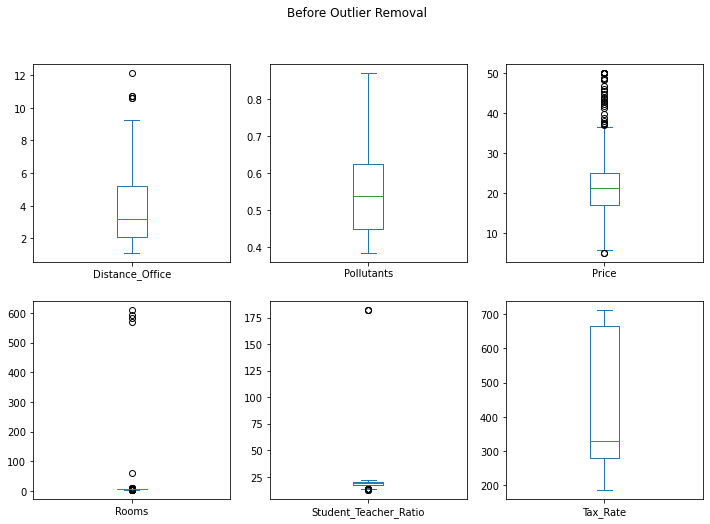

In [7]:
#Filter based on percentage values
percentage_columns = ['Non_Retail', 'Old_Housing', 'Low_Income']
for col in percentage_columns:
    filter = (df[col] <= 100) & (df[col] >= 0)
    df = df.loc[filter]

#Boxplot with Outliers
#Putting all numerical features into arr
datatypes = df_copy.dtypes
numerical_features = datatypes[datatypes!="object"].index
percentage_columns.append('ID')
numerical_features = np.setdiff1d(numerical_features, percentage_columns)

df_copy[numerical_features].plot(kind='box', title = "Before Outlier Removal",  subplots=True, layout=(2, 3), figsize=(12, 8))
plt.show()

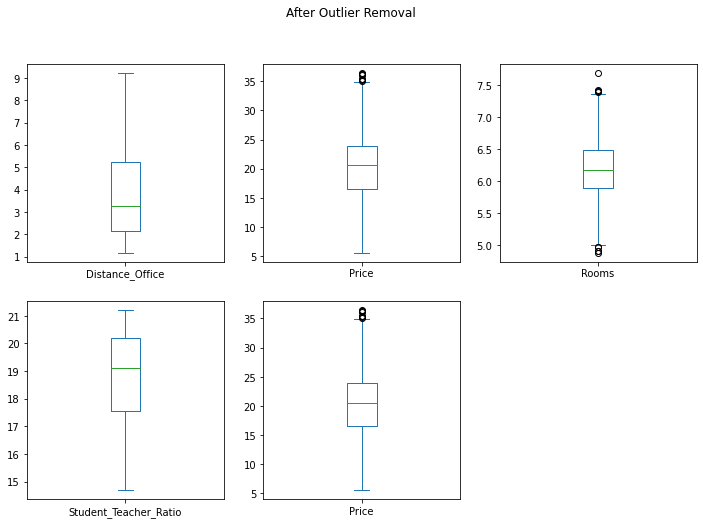

In [8]:
numerical_features = np.setdiff1d(numerical_features, ['Pollutants', 'Tax_Rate'])

# Generate IQR data for each column
IQR_arr = []
for column in list(numerical_features):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range.
    IQR_arr.append((Q1,Q3,IQR,column))
    
# Returns true for all values that are not outliers and filters the dataframe
for IQR in IQR_arr:
    filter = (df[IQR[3]] >= IQR[0] - 1.5 * IQR[2]) & (df[IQR[3]] <= IQR[1] + 1.5 *IQR[2])
    df = df.loc[filter]

# New boxplots
numerical_features = np.append(numerical_features, 'Price')
df[numerical_features].plot(kind='box', title = "After Outlier Removal",  subplots=True, layout=(2, 3), figsize=(12, 8))
plt.show()

In [9]:
deleted_rows = df_rows - df.shape[0]
print(f"{deleted_rows} rows removed")
print(f"{(deleted_rows / df_rows * 100):.2f}% of dataframe records removed")

82 rows removed
16.21% of dataframe records removed


<font color = red size = 3>
   [2c] 14%. Should check how many rows have been removed? Are there too many? What about Old_housing? Any anomalies?
</font>

**c.** For categorical variables, perform the necessary encoding.

**Response.** In the data given, there are 5 columns with categorical data: ID, Crime_Rate, Residential_Area, River and Highway_access. 
We decide to use ordinal encoding for all the categorical data except ID because these datas are ordinal whereby they have a clear ordering and therefore allows us to visualise these datas more clearer. We do not encode ID because ID values are unique and are not our focus for comparison.

In [10]:
df.reset_index(drop = True, inplace = True)

# List of categorical values, encoding is peformed based on index of value in list
crime_rate = ['Low', 'Moderate', 'High']
reside = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
highway =  ['Low', 'Moderate', 'High']
river = ['Near', 'Far']

columns = [crime_rate, reside, river, highway]

# Use OrdinalEncoder to encode values to new dataframe
enc = OrdinalEncoder(categories = columns)
encoded_df = pd.DataFrame(enc.fit_transform(df[['Crime_Rate', 'Residential_Area', 'River', 'Highway_Access']]),
                             columns = ['Crime_Rate_Encoded', 'Residential_Area_Encoded','River_Encoded', 'Highway_Access_Encoded'],
                             dtype = int)

# Merge both dataframes
frames = [df, encoded_df]
df = pd.concat(frames, axis = 1)
df = df.loc[:,~df.columns.duplicated()]
df.head()

,ID,Crime_Rate,Residential_Area,Non_Retail,River,Pollutants,Rooms,Old_Housing,Distance_Office,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price,Crime_Rate_Encoded,Residential_Area_Encoded,River_Encoded,Highway_Access_Encoded
0,1.0,Low,Very Low,2.31,Far,0.538,6.575,65.2,4.0900,Low,296,15.3,4.98,24.0,0,0,1,0
1,2.0,Low,Very Low,7.07,Far,0.469,6.421,78.9,4.9671,Low,242,17.8,9.14,21.6,0,0,1,0
2,3.0,Low,Very Low,7.07,Far,0.469,7.185,61.1,4.9671,Low,242,17.8,4.03,34.7,0,0,1,0
3,4.0,Low,Very Low,2.18,Far,0.458,6.998,45.8,6.0622,Low,222,18.7,2.94,33.4,0,0,1,0
4,5.0,Low,Very Low,2.18,Far,0.458,7.147,54.2,6.0622,Low,222,18.7,5.33,36.2,0,0,1,0


<font color = red size = 3>
   [2c] 5%
</font>

### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

**Response.** 

In [11]:
numerical_features = datatypes[datatypes!="object"].index
numerical_features = np.delete(numerical_features, np.where(numerical_features == "ID"))
df[numerical_features].describe()

,Non_Retail,Pollutants,Rooms,Old_Housing,Distance_Office,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,11.501557,0.555549,6.197226,68.310377,3.826733,411.933962,18.689387,13.978892,20.590566
std,6.776248,0.116887,0.490449,28.069039,2.010780,167.714678,1.911977,10.684515,6.286547
min,0.740000,0.385000,4.880000,2.900000,1.174200,188.000000,14.700000,1.980000,5.600000
25%,5.860000,0.452000,5.886500,45.075000,2.124125,284.750000,17.550000,7.845000,16.475000
50%,9.900000,0.538000,6.167000,76.700000,3.275900,341.000000,19.100000,12.335000,20.550000
75%,18.100000,0.624000,6.487750,93.925000,5.255350,666.000000,20.200000,17.225000,23.900000
max,27.740000,0.871000,7.691000,100.000000,9.222900,711.000000,21.200000,100.000000,36.400000


<font color = red size = 3>
   [3a] 8%. Most of these measures e.g. mean, std, min, max do not apply for categorical variables  
</font>

**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

**Response.** We decide to drop ID because there will not be any insights that we can take away from its histogram. From the histograms and bar charts below, we are able to observe a few key observations. 
1) Low_Income and Distance_Office are left skewed.  
2) Tax_Rate, Old_housing and Student_Teacher_Ratio are very right skewed.  
3) Non_Retail, Rooms and Price follows a normal distribution.  
4) One unique histogram is that of pollutants whereby it is evenly distributed.  
5) All categorical features have a dominant value.

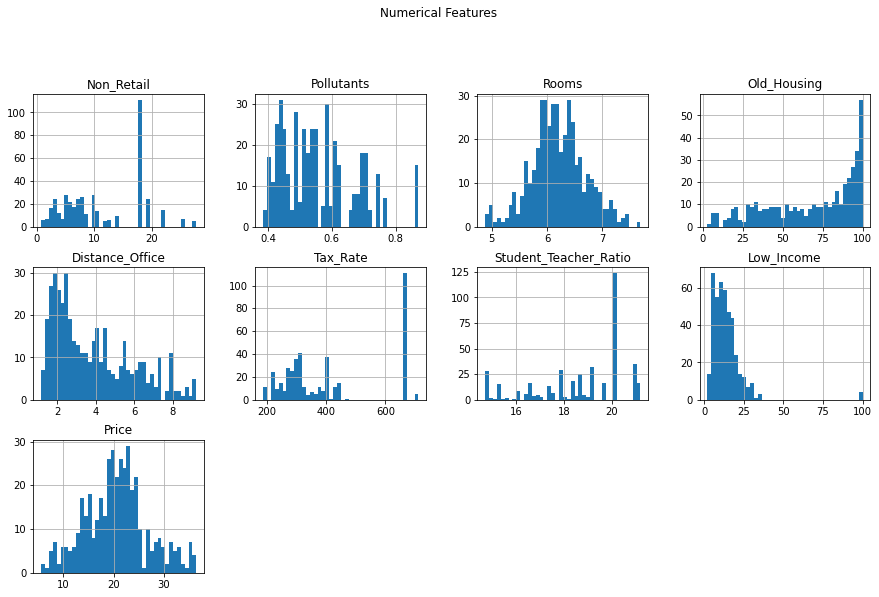

In [12]:
# Plot histograms for numerical features
df[numerical_features].hist(layout=(4, 4), figsize=(15, 12), bins=40)
plt.suptitle("Numerical Features")
plt.show()

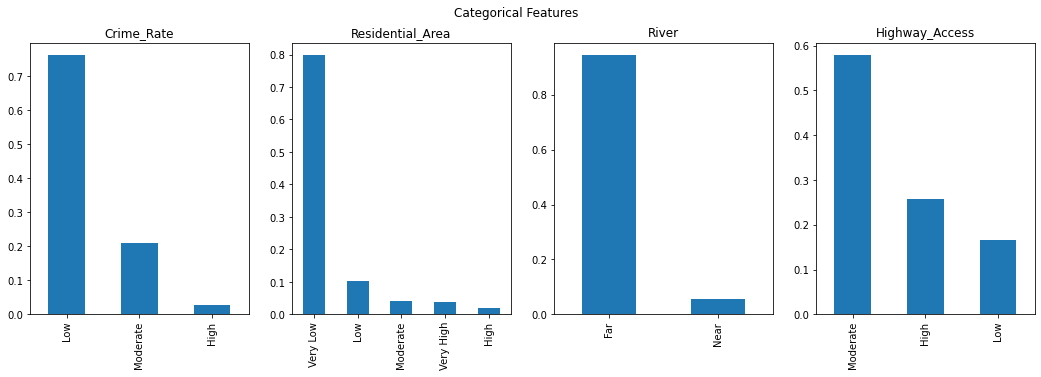

In [13]:
# Plot bar graphs for categorical features

categorical_features = datatypes[datatypes=="object"].index

n = len(categorical_features)

r, c = 1,4
fig, ax = plt.subplots(r, c, figsize=(18,5))

for i in range(n):
    feature = categorical_features[i]
    ax = plt.subplot(r,c,i+1)
    ax.set_title(feature)
    df[feature].value_counts(normalize=True).plot(kind='bar')
    
plt.suptitle("Categorical Features")
plt.show()

<font color=red size=4>
    [3b]: 15%. Histogram is not applicable for categorical variables. Missing separate summary for categorical
</font>

**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

**Response.** We decide to do bi-variate analysis on income against median price of homes in thousands , we are able to see that it closely represents a negative ln graph. We then derive the correlation between the 2 variables which is -0.7892923. This indicates that the variables are closely related.  Furthermore, we are also able to obtain a negative covariance of -31.75616921 which indicates that median price of homes in thousands and percentage of low income moves in the opposite direction. Thus, as the percentage of low income households decreases, the median price of homes in thousands increases.

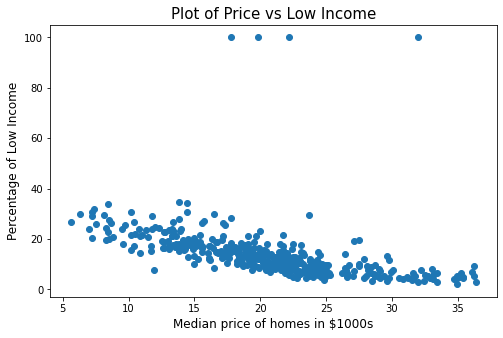

In [14]:
xs = df.Price
ys = df.Low_Income

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Plot of Price vs Low Income", fontsize=15)
plt.xlabel("Median price of homes in $1000s", fontsize=12)
plt.ylabel("Percentage of Low Income", fontsize=12)
plt.show()

In [15]:
corr = np.corrcoef(xs, ys)
corr

array([[ 1.        , -0.45552412],
       [-0.45552412,  1.        ]])

In [16]:
cov = np.cov(xs, ys)
cov

array([[ 39.52066729, -30.5969632 ],
       [-30.5969632 , 114.15886189]])

<font color=red size=4>
    What is the relevance of individual variable variances?
</font>

**Response.** We decide to do bi-variate analysis on No of Rooms against median price of homes in thousands , we can see that it is a positive linear graph. We are able to derive that that firstly, the correlation is 0.58083482. This indicates that there is actually a legitimate relationship between these 2 variables. Furthermore, we are also able to obtain a positive covariance of 1.77406727 which indicates that median price of homes in thousands and percentage of low income moves in the same direction. Hence, we conclude that as the number of rooms in a house increases , the median price of homes in thousands also increases.

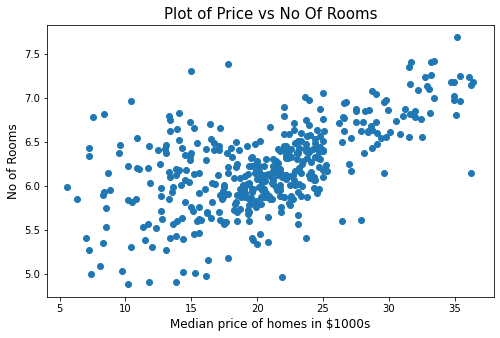

In [17]:
xs = df.Price
ys = df.Rooms

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Plot of Price vs No Of Rooms", fontsize=15)
plt.xlabel("Median price of homes in $1000s", fontsize=12)
plt.ylabel("No of Rooms", fontsize=12)
plt.show()

In [18]:
corr = np.corrcoef(xs, ys)
corr

array([[1.        , 0.58416522],
       [0.58416522, 1.        ]])

In [19]:
cov = np.cov(xs, ys)
cov

array([[39.52066729,  1.80111774],
       [ 1.80111774,  0.24054069]])

**Response.** We decide to do bi-variate analysis on Percentage of Old Housing against Percentage of Low Income households , we can see that it is similar to a Ln graph. We are able to derive that that firstly, the correlation is  0.65340102.  This indicates that there is actually a legitimate relationship between these 2 variables. Furthermore, we are also able to obtain a positive covariance of 118.8426922 which indicates that the percentages of Old Housing and Percentages of Low Incomes moves in the same direction. Hence, as the Percentage of Low Income households increases, the Percentage of Old Housing also increases.

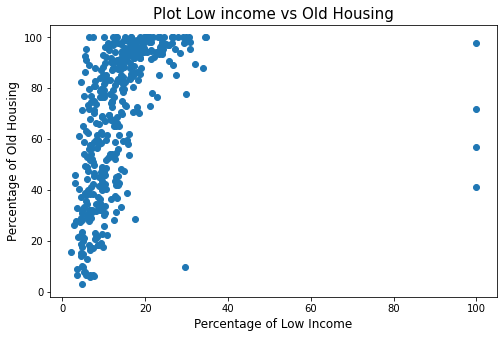

In [20]:
xs = df.Low_Income
ys = df.Old_Housing

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Plot Low income vs Old Housing", fontsize=15)
plt.xlabel("Percentage of Low Income", fontsize=12)
plt.ylabel("Percentage of Old Housing", fontsize=12)
plt.show()

In [21]:
corr = np.corrcoef(xs, ys)
corr

array([[1.        , 0.40121868],
       [0.40121868, 1.        ]])

In [22]:
cov = np.cov(xs, ys)
cov

array([[114.15886189, 120.32711555],
       [120.32711555, 787.87095589]])

**Response.** We decide to do bi-variate analysis on Percentage of Low Income and Crime Rate using Boxplot, from the boxplot, we can see that as that the mean of Low Income percentage is highest for high crime rate followed by moderate and low, this indicates that the higher the crime rate, the higher the percentage of lower income and that this relationship is legitimate.

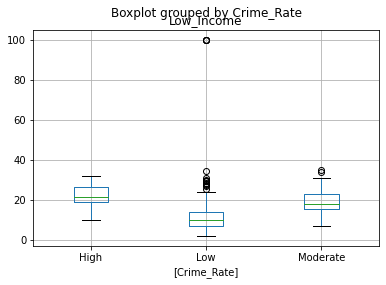

In [38]:
df[['Low_Income','Crime_Rate']].boxplot(by='Crime_Rate')
plt.show()

**Response.** We decide to do bi-variate analysis on No of Rooms against percentage of Low Income , we can see that it is similar to a negative Ln graph. We are able to derive that that firstly, the correlation is -0.56333616.  This indicates that there is actually a legitimate relationship between these 2 variables. Furthermore, we are also able to obtain a covariance of -1.77098954 which indicates that the percentages of Low Income and Rooms moves in the opposite direction. Hence, as the Percentage of Low Income households increases, the No of Rooms decreases.

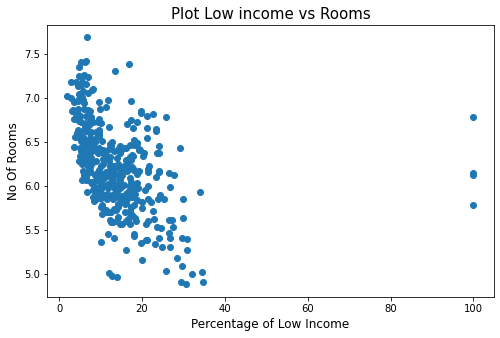

In [24]:
xs = df.Low_Income
ys = df.Rooms

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Plot Low income vs Rooms", fontsize=15)
plt.xlabel("Percentage of Low Income", fontsize=12)
plt.ylabel("No Of Rooms", fontsize=12)
plt.show()

In [25]:
corr = np.corrcoef(xs, ys)
corr

array([[ 1.        , -0.34688457],
       [-0.34688457,  1.        ]])

In [26]:
cov = np.cov(xs, ys)
cov

array([[114.15886189,  -1.81774968],
       [ -1.81774968,   0.24054069]])

<font color=red size=4>
    [3c]: 20%
</font>

## Part II: Modeling [12% of final grade]

### 1. Problem formulation [15% of Part II]

**a.** Formulate one regression problem and one classification based on the dataset, in **no more than 50 words**.

**Response.** <br><br>
Regression: `Price`
it is important to understand what drives house prices and develop a sound method to be able to predict the fair value of a house. <br><br>
Classfication: `Crime_Rate`  
The country has a low crime rate, it is important that we figure out the variables that contribute to it.

**b.** State which problem (regression or classification) you would be investigating and why, in **no more than 20 words**.

**Response.** 
<br>Regression. Determining the `Price` of homes is more likely to be  affected by multiple factors compared to `Crime_Rate`.

**c.** Clearly specify the dependent variable you are predicting, and its significance, in **no more than 20 words**

**Response.** Dependent variable: Price of homes <br> Home ownership is a major decision and is very likely to be affected by price.

### 2. Model training [30% of Part II]

**a.** Perform feature selection. For each variable, decide if you want to include it as a feature and provide a justification. You may leverage on your analysis in Part I: EDA and/or perform additional analysis.

**Response.** 

From the barplots plotted in Part 1 Question 3 b., we observed that all of the categorical variables have a dominant value whose frequency exceeds 50%.  The lack of variation in these variables means that these variables are likey to have little explanatory power on the variation in `Price`.  Hence we will not select these features. <br><br>
To select numerical features, we first determine whether our dependent variable `Price` is correlated with our independent variables. This is visualised using a heatmap. From the heatmap below, we can observe that variables like `Student_Teacher_Ratio` and `Distance_Office` are not correlated with `Price`. After that, we write a function to select the features based on a threshold.

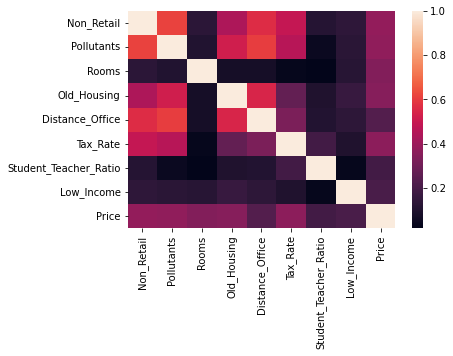

In [27]:
features_selected = numerical_features
r2 = df[features_selected].corr()**2
sns.heatmap(r2)
plt.show()

In [28]:
# given a dataframe df, and a target variable and threshold
# return all columns in df which are 'highly' correlated to target
# definition of 'high' correlated given by parameter threshold

def corr_features(df, target, threshold):
    corr_features = []
    for feature in df.columns:
        if feature==target: continue
        x = df[feature]
        y = df[target]
        r2 = np.corrcoef(x,y)[0][1]
        if abs(r2)>threshold:
            corr_features.append(feature)
    return corr_features

features_selected = corr_features(df[features_selected], 'Price', 0.5)
print(f"updated selected features: {features_selected}")

updated selected features: ['Non_Retail', 'Pollutants', 'Rooms', 'Old_Housing', 'Tax_Rate']


We further check if our selected features are highly correlated to each other. For example from the heatmap below, we can observe that `Pollutants` and `Non_Retail` are closely correlated to each other. Including multiple closely correlated features would be redundant and not improve our final model. Using some additional functions, we filter such features out to get our final list of selected features.

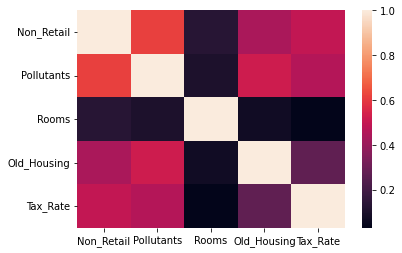

In [29]:
r2 = df[features_selected].corr()**2
sns.heatmap(r2)
plt.show()

In [30]:
# get the feature that has the most number of features
# it is correlated with, beyond certain threshold

def most_corr_feature(df, threshold):
    r2_matrix = abs(df.corr())
    count = r2_matrix[r2_matrix>threshold].count()
    return count.sort_values(ascending=False).index[0]

# return true if all the features are uncorrelated,
# as defined by a threshold

def all_features_uncorr(df, threshold):
    r2_matrix = abs(df.corr())
    n = len(r2_matrix)
    return r2_matrix[r2_matrix>threshold].count().sum()==n

# get a set of uncorrelated features

def get_uncorr_features(df, threshold):
    features = df.columns.tolist()
    while all_features_uncorr(df[features], threshold) == False:
        most_corr_fea = most_corr_feature(df[features], threshold)
        features.remove(most_corr_fea)
    return features

features_selected = get_uncorr_features(df[features_selected], 0.5)
print(f"Final selected features : {features_selected}")

Final selected features : ['Rooms', 'Tax_Rate']


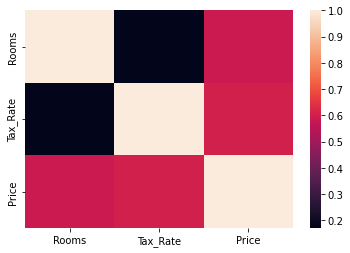

In [31]:
df[features_selected+['Price']].corr()
r2 = abs(df[features_selected+['Price']].corr())
sns.heatmap(r2)

plt.show()

**b.** Split the dataset into train and test sets. Describe how you split step by step.

**Response.** We make use of the `train_test_split` function found in the `sklearn.model_selection` package. We use 'X' to denote the subset of our dataframe that contains values for the features selected in the previous part and 'y' to denote the values for the dependent variable 'Price'. The `train_test_split` function splits X and y randomly into 75/25 as we wish to keep 25% of the dataset for model evaluation purpose. `random_state` is set to 42 to ensure reproducibility of result.

In [32]:
### train_test_split

from sklearn.model_selection import train_test_split

X = df[features_selected]
y = df[["Price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

**c.** State the model(s) you will train, and explain your choice(s), in **no more than 50 words per model**. You only need to
train one model, but if you do train more models, limit yourself to no more than three---Grading is based on the validity and soundness of your model, rather than the quantity.

**Response.** 

We will train 2 models: `Linear Regression` and `Ridge`.

`Linear Regression` is chosen as it is one of the most common regression training models. It follows the least squares method to determine the coefficient for each of the selected features. However when features are correlated, the model may become highly sensitive to random errors in the observed target.

`Ridge` regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. Hence, this model is less reliant on features being independent from each other. 

**d.** For each model, perform the training, and report the trained parameters and the training scores, if applicable. 

**Response.** For each of the model, the training scores are reported as below and we also included the equations that we will get to predict the response variable

In [33]:
## model fitting for linear regression

from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(X_train, y_train)
model1_r2 = model1.score(X_train, y_train)
coef1 = model1.coef_
bias1 = model1.intercept_
features1 = X_train.columns.tolist()

print("Model 1: Linear Regression ")
print("--------------------------")
print(f"Features : {features1}")
print(f"Coefficients: {coef1[0]}")
print(f"Intercept : {bias1[0]}")
print(f"Coeff of Determination : {model1_r2}")

print(f"\nEquation: Price = {bias1[0]:.3f}", end = " ")
for i in range(len(features1)):
    print(f"+ {features1[i]} x {coef1[0][i]:.3f}", end = " ")

Model 1: Linear Regression 
--------------------------
Features : ['Rooms', 'Tax_Rate']
Coefficients: [ 5.98870584 -0.02051891]
Intercept : -7.97064092750821
Coeff of Determination : 0.632912965099957

Equation: Price = -7.971 + Rooms x 5.989 + Tax_Rate x -0.021 

In [34]:
## model fitting for ridge

from sklearn.linear_model import Ridge

model2 = Ridge().fit(X_train, y_train)
model2_r2 = model2.score(X_train, y_train)
coef2 = model2.coef_
bias2 = model2.intercept_
features2 = X_train.columns.tolist()

print("Model 2: Ridge Regression")
print("-------------------------")
print(f"Features : {features2}")
print(f"Coefficients: {coef2[0]}")
print(f"Intercept : {bias2[0]}")
print(f"Coeff of Determination : {model2_r2}")

print(f"\nEquation: Price = {bias2[0]:.3f}", end = " ")
for i in range(len(features2)):
    print(f"+ {features2[i]} x {coef2[0][i]:.3f}", end = " ")

Model 2: Ridge Regression
-------------------------
Features : ['Rooms', 'Tax_Rate']
Coefficients: [ 5.91100667 -0.02057168]
Intercept : -7.468014198561104
Coeff of Determination : 0.6328774238473562

Equation: Price = -7.468 + Rooms x 5.911 + Tax_Rate x -0.021 

### 3. Model evaluation and selection [30% of Part II]

**a.** For each model, predict the response variable on the test set.

**Response.** For each of the model, we used the Equation that we are able to derive to predict the response variable on the test.

In [40]:
result = pd.concat([X_test, y_test], axis = 1)
model_list = [model1, model2]
y_pred_list = []
i = 1;

for model in model_list:
    y_pred = model.predict(X_test)
    y_pred = y_pred.flatten()
    y_pred_list.append(y_pred)
    result['Model_' + str(i)] = y_pred.round(decimals = 2)
    i+=1

result.sort_index()

,Rooms,Tax_Rate,Price,Model_1,Model_2
0,6.575,296,24.0,25.33,25.31
3,6.998,222,33.4,29.38,29.33
5,6.430,222,28.7,25.98,25.97
9,6.004,311,18.9,21.60,21.62
15,5.834,307,19.9,20.67,20.70
...,...,...,...,...,...
412,5.926,391,24.5,19.50,19.52
415,5.794,391,18.3,18.71,18.74
416,6.019,391,21.2,20.05,20.07
419,6.593,273,22.4,25.91,25.89


**b.** Describe the metric you use to evaluate your model(s). Report the test scores for each model.

**Response.**  For all our models, we decided to use the metrics Mean Absolute Error(MAE) and Root Mean Square Error(RMSE). We also decide to include the MAE as a percentage of the mean of the price.Based on our evaluation metrics on the test set for different models, we are able to achieve these test scores for each models.

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 

i = 0
for y_pred in y_pred_list:
    i += 1
    mae = mean_absolute_error(y_test, y_pred)
    ave = np.mean(y_test["Price"])
    rmse = mean_squared_error(y_test, y_pred, squared = False)  # setting squared = False returns the square-root 

    print("Model " + str(i) + " Evaluation")
    print("-----------------")
    print(f"MAE: {mae:.2f}")
    print(f"MAE as % of mean: {mae/ave*100:.1f}%")
    print(f"RMSE: {rmse:.2f}\n\n")

Model 1 Evaluation
-----------------
MAE: 3.34
MAE as % of mean: 16.2%
RMSE: 4.25


Model 2 Evaluation
-----------------
MAE: 3.34
MAE as % of mean: 16.2%
RMSE: 4.26




**c.** If you trained more than one model, identify the final model you would choose for the prediction task, and explain your choice, **in no more than 50 words**.

**Response.** We have decided to choose Linear Regression as the final model. From our evaluation metrics above, the evaluation metric for Ridge and Linear Regression is extremely similar with their MAE being the same. However the RMSE is lower for Linear Regression and therefore Linear Regression evaluation score is slightly better.

### 4. Findings and conclusion [20% of Part II]

**a.** Interpret what your model is implying, and summarize any insight you have drawn from the project. Explain if it is consistent with intuition, and if not, provide a plausible justification. Limit your entire response to **50 words**.

**Response.** <br>
Price is closely related to Rooms and Tax_Rate. Furthermore, Rooms has a larger coefficient than Tax_Rate implying that Rooms is more likely to affect the Price. It is consistent with intuition, however we expected more variables such as Pollutants to also affect the Price.

**b.** Share any lesson you have learned from the project, in **no more than 50 words**.

**Response.**<br>
We learnt the process of simple data science and the importance of teamwork. We also learnt about the value of Python as a tool for data science and how to use it for data visualisation, analysis, and more importantly, how to produce and read data in a easily-digestible format.

### 5. Non-technical protocol [5% of Part II]

**b.** List any references and sources you have cited.

**Response.** 

### References

https://scikit-learn.org/stable/modules/linear_model.html#
<br><br>https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization#:~:text=The%20differences%20between%20L1%20and,regularization%20solution%20is%20non%2Dsparse